# Cross validation


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

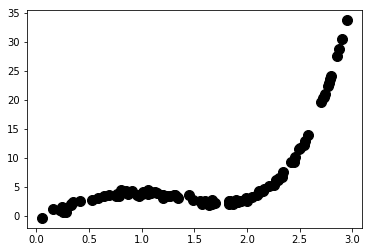

In [3]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [4]:
from sklearn.model_selection import train_test_split
# train test split dzieli zbiór na dane testowe i dane uczące, podajemy proporcje, ważne random_state
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [9]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [10]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([14.93478881, 14.06167306,  0.07059713,  0.06331824,  0.07620005,
       19.86589273,  0.0673241 , 10.64706263, 15.7053253 ,  1.21147778,
        2.81466149, 11.78603116,  0.23285469,  7.83455906,  5.14954116,
       11.61119201, 10.94430076,  4.66097316, 15.88246633, 23.42451044,
        1.44252802,  0.64731961,  3.07668711,  0.22178275, 11.12918362,
        4.76360002,  3.38849996,  4.42550167,  4.46791086, 20.23580819,
        4.48136484,  2.50839542,  0.06238938,  0.13856041, 10.26304643,
        0.09549752,  1.18342327,  9.59141724,  1.88604174,  0.59469446])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.7774048028876313
Explained variance score: 0.7774048028876313
Median absolute error: 2.5432119025878515
Mean squared error: 13.586608823566143
Mean absolute errors: 2.999469514233545


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25